Required imports

In [14]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

# For QQ-plots
import pylab
from scipy.stats import probplot

## Kernel density estimates

Let's try building a kernel density estimate from a histogram!

Let's go beyond normal distribution – let's make a **mix of 2 normal distributions** (aka the Gaussian mixture):

For that, sample 2 series of points:

In [15]:
a = np.random.normal(loc=0, scale=0.3, size=1000)
b = np.random.normal(loc=1, scale=0.2, size=1200)

ds = pd.Series(np.concatenate((a,b)))

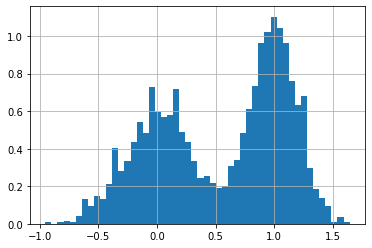

In [16]:
ds.hist(bins=50,density=True)

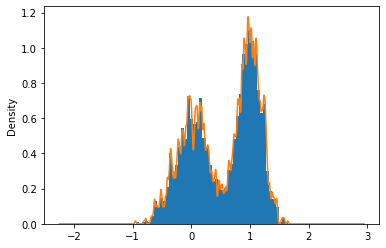

In [25]:
ax = ds.hist(bins=50, density=True)
ds.plot.density(ax=ax,bw_method=0.02)

**Exercise:** Let’s study the influence of the **bandwidth** (smoothing parameter) on the smoothness of the resulting density estimate!

# Central Limit Theorem

In this problem we'll examine the Central Limit Theorem – that the **distribution of averages** of larger and larger samples (subsets) of a dataset – is getting closer and closer to normal distribution!
And the std. of it decays as $\sim1/\sqrt{\textrm{size(sample)}}$.

Let's sample a large dataset of numbers from some distribution that is far from normal:

In [36]:
X = np.random.laplace(size=200)

(array([ 5.,  4., 12., 33., 90., 34., 14.,  5.,  2.,  1.]),
 array([-4.54349528, -3.54916392, -2.55483256, -1.56050121, -0.56616985,
         0.42816151,  1.42249287,  2.41682423,  3.41115559,  4.40548695,
         5.39981831]),
 <a list of 10 Patch objects>)

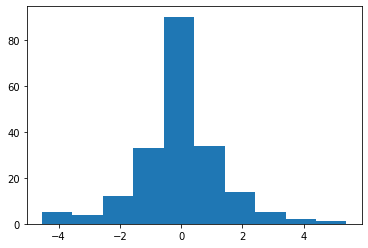

In [37]:
plt.hist(X)

To see how **far from a normal** distribution it is, let's make a QQ-plot!

Let me help you a bit with this:

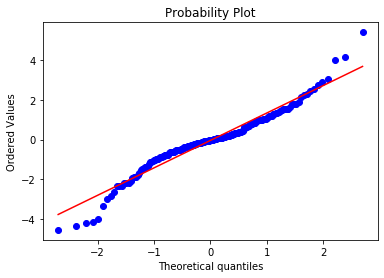

In [38]:
probplot(X,dist='norm',plot=pylab)
pylab.show()

**Task #1** Write a function, $f(X, n, s)$, that would take a dataset, $X$ (of some size, denote it $N$) and then would **randomly draw** (with or without repetition?) $n$ samples of size $s$ and then compute the **means** of all each sample, thus **returning** a set of $n$ numbers – means of size-$s$ random subsets of $X$.

**Task #2** Now, let us increase $s$ – the **size** of the sample (keeping the number of them, $n$, the same – let us make it, say, $n=N/2$) and see how the **distribution of sample means gets more and more normal** – by drawing QQ-plots!

Let $N$, the size of $X$, be 500 – then let $s$ run through: $s = 10,~20,~50,~100,~200$

**Task #3** Let's see how the **std-s** of these sample means distributions **change with sample size!** (Let's make a plot of `(sample_zise, std)` for the above mentioned values of $s$!

How do we **make sure** that it looks (or not) like our theoretical prediction, $\sim1/\sqrt{\textrm{size(sample)}}$